<a href="https://colab.research.google.com/github/FawwazMayda/BangkitPlantPathology/blob/master/bangkit_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v

Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
     |████████████████████████████████| 1.5MB 4.7MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 2.6 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=939e800b86d85f43828a02c424676b3397cb7c550ebc9e53caca9699bae27b7a
  Stored in directory: /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01
Successfully built kaggle
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.6/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.6/dist-packages/kaggle/api/kaggle_api_extended.py", line 149, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure

In [ ]:
import os
os.environ['KAGGLE_USERNAME']="medias"
os.environ['KAGGLE_KEY']="81947b1f4b57deb83c0352454879db4f"

In [ ]:
!kaggle competitions download -c plant-pathology-2020-fgvc7

 98% 761M/779M [00:10<00:00, 50.5MB/s]
100% 779M/779M [00:10<00:00, 80.5MB/s]


In [ ]:
!unzip plant-pathology-2020-fgvc7.zip

Archive:  plant-pathology-2020-fgvc7.zip
  inflating: images/Test_0.jpg       
  inflating: images/Test_1.jpg       
  inflating: images/Test_10.jpg      
  inflating: images/Test_100.jpg     
  inflating: images/Test_1000.jpg    
  inflating: images/Test_1001.jpg    
  inflating: images/Test_1002.jpg    
  inflating: images/Test_1003.jpg    
  inflating: images/Test_1004.jpg    
  inflating: images/Test_1005.jpg    
  inflating: images/Test_1006.jpg    
  inflating: images/Test_1007.jpg    
  inflating: images/Test_1008.jpg    
  inflating: images/Test_1009.jpg    
  inflating: images/Test_101.jpg     
  inflating: images/Test_1010.jpg    
  inflating: images/Test_1011.jpg    
  inflating: images/Test_1012.jpg    
  inflating: images/Test_1013.jpg    
  inflating: images/Test_1014.jpg    
  inflating: images/Test_1015.jpg    
  inflating: images/Test_1016.jpg    
  inflating: images/Test_1017.jpg    
  inflating: images/Test_1018.jpg    
  inflating: images/Test_1019.jpg    
  inflati

In [ ]:
pip install -U --pre efficientnet

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import efficientnet.tfkeras as efn
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import shutil

In [ ]:
submission = pd.read_csv("sample_submission.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
train.sample(20)

,image_id,healthy,multiple_diseases,rust,scab
1667,Train_1667,1,0,0,0
45,Train_45,0,0,1,0
143,Train_143,0,0,0,1
72,Train_72,1,0,0,0
899,Train_899,0,0,0,1
641,Train_641,0,0,0,1
1083,Train_1083,0,0,0,1
241,Train_241,0,0,1,0
741,Train_741,0,0,1,0
37,Train_37,0,0,1,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   image_id           1821 non-null   object
 1   healthy            1821 non-null   int64 
 2   multiple_diseases  1821 non-null   int64 
 3   rust               1821 non-null   int64 
 4   scab               1821 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 71.3+ KB


In [ ]:
os.mkdir("img")
os.mkdir("img/train/")
os.mkdir("img/validation/")
os.mkdir("img/test")
os.mkdir("img/test/all_images")
os.mkdir("img/train/healthy/")
os.mkdir("img/train/multiple_diseases/")
os.mkdir("img/train/rust/")
os.mkdir("img/train/scab/")
os.mkdir("img/validation/healthy/")
os.mkdir("img/validation/multiple_diseases/")
os.mkdir("img/validation/rust/")
os.mkdir("img/validation/scab/")

In [ ]:
from sklearn.model_selection import train_test_split
TRAIN_DIR = "img/train"
VALIDATION_DIR = "img/validation"
TEST_DIR = "img/test/all_images"

In [ ]:
train_df,valid_df = train_test_split(train,test_size=0.2)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 845 to 688
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   image_id           1456 non-null   object
 1   healthy            1456 non-null   int64 
 2   multiple_diseases  1456 non-null   int64 
 3   rust               1456 non-null   int64 
 4   scab               1456 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 68.2+ KB


In [ ]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1437 to 531
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   image_id           365 non-null    object
 1   healthy            365 non-null    int64 
 2   multiple_diseases  365 non-null    int64 
 3   rust               365 non-null    int64 
 4   scab               365 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 17.1+ KB


In [ ]:
valid_df.head()

,image_id,healthy,multiple_diseases,rust,scab
1437,Train_1437,0,0,1,0
1620,Train_1620,0,0,0,1
379,Train_379,0,0,0,1
24,Train_24,1,0,0,0
1511,Train_1511,0,0,1,0


In [ ]:
def insertIntoArr(df,array_x,array_y=None):
  for i in tqdm(range(len(df))):
    filename = df.iloc[i,0]
    fnpath = "images/{}.jpg".format(filename)
    img = cv2.imread(fnpath)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(224,224))
    img = img.astype('float32')
    array_x.append(img)
    if array_y != None:
      class_idx = (df.iloc[i,1:])
      array_y.append(class_idx)
      
#full_data = []
#full_label = []
train_data = []
train_label = []
validation_data = []
validation_label = []
test_data = []

#insertIntoArr(train,full_data,full_label)
insertIntoArr(train_df,train_data,train_label)
insertIntoArr(valid_df,validation_data,validation_label)
insertIntoArr(test,test_data)

#full_data = np.array(full_data,dtype=np.float32)
#full_label = np.array(full_label,dtype=np.float32)
train_data = np.array(train_data,dtype=np.float32)
train_label = np.array(train_label,dtype=np.float32)
validation_data = np.array(validation_data,dtype=np.float32)
validation_label = np.array(validation_label,dtype=np.float32)
test_data = np.array(test_data,dtype=np.float32)

100%|██████████| 1821/1821 [00:56<00:00, 32.20it/s]


In [ ]:
print(train_data.shape)
print(train_label.shape)
print(validation_data.shape)
print(validation_label.shape)
print(test_data.shape)

(1456, 224, 224, 3)
(1456, 4)
(365, 224, 224, 3)
(365, 4)
(1821, 224, 224, 3)


In [ ]:
moveImgInto(train_df,"img/train")

In [ ]:
moveImgInto(valid_df,"img/validation")

In [ ]:
for i in range(len(test)):
  filename = test.iloc[i,0]
  src = "images/{}.jpg".format(filename)
  dest = "img/test/all_images/{}.jpg".format(filename)
  shutil.copy(src,dest)

In [ ]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator( 
                                                            rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
                                                            zoom_range = 0.1, # Randomly zoom image 
                                                            width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
                                                            height_shift_range=0.2,
                                                            horizontal_flip=True,vertical_flip=True,
                                                            preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
valid_gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

train_gen.fit(train_data)
valid_gen.fit(validation_data)
test_gen.fit(test_data)

In [ ]:
vgg_base = tf.keras.applications.vgg16.VGG16(include_top=False,input_shape=(224,224,3),pooling='avg')
vgg_base.trainable = False

model_vgg16 = tf.keras.models.Sequential()
model_vgg16.add(vgg_base)
model_vgg16.add(tf.keras.layers.Flatten())
model_vgg16.add(tf.keras.layers.Dense(300,activation='relu'))
model_vgg16.add(tf.keras.layers.Dense(100,activation='relu'))
model_vgg16.add(tf.keras.layers.Dense(4,activation='softmax'))
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)

    

callbacks = [reduce_lr]
model_vgg16.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy',tf.keras.metrics.AUC()])

In [ ]:
model_vgg16.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               153900    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 404       
Total params: 14,899,092
Trainable params: 184,404
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
history_vgg16 = model_vgg16.fit_generator(train_gen.flow(train_data,train_label,batch_size=32),epochs=40,
                                validation_data=valid_gen.flow(validation_data,validation_label,batch_size=32))
#Refit purpose
#model_vgg19.fit((train_gen.flow(full_data,full_label,batch_size=32),epochs=40,callbacks=callbacks)

Epoch 1/40
46/46 [==============================] - 16s 348ms/step - loss: 1.0494 - accuracy: 0.6216 - auc_1: 0.8416 - val_loss: 0.7099 - val_accuracy: 0.7342 - val_auc_1: 0.9190
Epoch 2/40
46/46 [==============================] - 15s 335ms/step - loss: 0.6295 - accuracy: 0.7651 - auc_1: 0.9331 - val_loss: 0.8423 - val_accuracy: 0.6932 - val_auc_1: 0.9081
Epoch 3/40
46/46 [==============================] - 15s 335ms/step - loss: 0.5681 - accuracy: 0.7953 - auc_1: 0.9446 - val_loss: 0.6502 - val_accuracy: 0.7699 - val_auc_1: 0.9361
Epoch 4/40
46/46 [==============================] - 16s 337ms/step - loss: 0.5084 - accuracy: 0.8084 - auc_1: 0.9554 - val_loss: 0.5908 - val_accuracy: 0.7918 - val_auc_1: 0.9474
Epoch 5/40
46/46 [==============================] - 16s 338ms/step - loss: 0.5002 - accuracy: 0.8173 - auc_1: 0.9572 - val_loss: 0.5215 - val_accuracy: 0.8137 - val_auc_1: 0.9557
Epoch 6/40
46/46 [==============================] - 15s 332ms/step - loss: 0.4478 - accuracy: 0.8359 - au

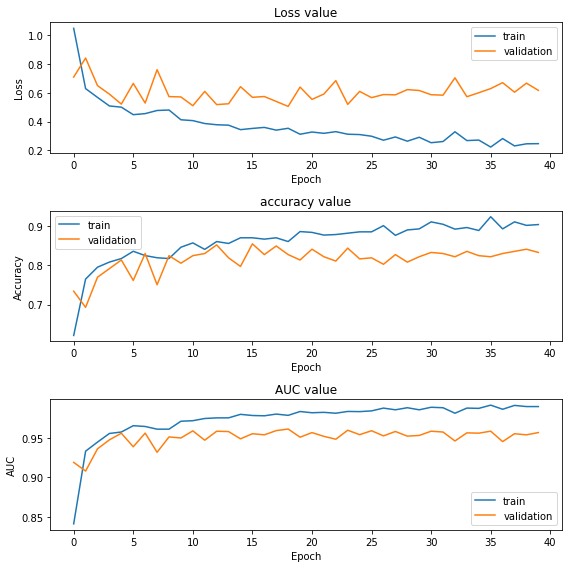

<Figure size 432x288 with 0 Axes>

In [ ]:
def plot_history(hist,auc_num,name):
  fig,ax = plt.subplots(3,1,figsize=(8,8))
  plt.title("VGG 16 Performance")
  ax[0].plot(hist.history['loss'],label='train')
  ax[0].plot(hist.history['val_loss'],label='validation')
  ax[0].set_title("Loss value")
  ax[0].set_xlabel("Epoch")
  ax[0].set_ylabel("Loss")
  ax[0].legend()


  ax[1].plot(hist.history['accuracy'],label='train')
  ax[1].plot(hist.history['val_accuracy'],label='validation')
  ax[1].set_title("accuracy value")
  ax[1].set_xlabel("Epoch")
  ax[1].set_ylabel("Accuracy")
  ax[1].legend()


  ax[2].plot(hist.history['auc_'+str(auc_num)],label='train')
  ax[2].plot(hist.history['val_auc_'+str(auc_num)],label='validation')
  ax[2].set_title("AUC value")
  ax[2].set_xlabel("Epoch")
  ax[2].set_ylabel("AUC")
  ax[2].legend()

  plt.tight_layout()
  plt.legend()
  plt.show()
  plt.savefig("{}.png".format(name))

plot_history(history_vgg16,auc_num=1,name="vgg16")

In [ ]:
y_pred=model_vgg19.predict(test_gen.flow(test_data))
submission_vgg19 = submission.copy()
submission_vgg19.loc[:,'healthy':'scab']=y_pred

In [ ]:
submission_vgg19.to_csv('submission_vgg19.csv',index=False)
submission_vgg19.sample(20)

,image_id,healthy,multiple_diseases,rust,scab
926,Test_926,3.938840e-14,6.891382e-14,1.000000e+00,2.617758e-23
161,Test_161,1.775089e-09,8.737949e-06,2.948497e-08,9.999913e-01
1569,Test_1569,4.335519e-07,8.708189e-04,1.718365e-06,9.991271e-01
1285,Test_1285,8.282868e-06,3.932589e-03,9.960592e-01,3.706591e-09
1388,Test_1388,4.806790e-03,8.572442e-05,9.947451e-01,3.623894e-04
1061,Test_1061,1.657087e-06,1.549882e-08,9.999982e-01,1.739774e-07
1817,Test_1817,2.843811e-01,8.240678e-03,5.326799e-02,6.541103e-01
1401,Test_1401,1.798845e-08,1.199211e-15,1.000000e+00,9.809485e-19
293,Test_293,1.092442e-09,1.224142e-06,9.999951e-01,3.665683e-06
339,Test_339,9.329249e-07,1.862184e-04,6.755419e-04,9.991373e-01


In [ ]:
!kaggle competitions submit -c plant-pathology-2020-fgvc7 -f submission_vgg19.csv -m "bangkit Final VGG19(3) "

100% 164k/164k [00:21<00:00, 7.66kB/s]
Successfully submitted to Plant Pathology 2020 - FGVC7

#Resnet 152

In [ ]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator( 
                                                            rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
                                                            zoom_range = 0.1, # Randomly zoom image 
                                                            width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
                                                            height_shift_range=0.2,
                                                            horizontal_flip=True,vertical_flip=True,
                                                            preprocessing_function=tf.keras.applications.resnet.preprocess_input)
valid_gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input)
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input)

train_gen.fit(train_data)
valid_gen.fit(validation_data)
test_gen.fit(test_data)

In [ ]:
resnet_base = tf.keras.applications.resnet.ResNet152(include_top=False,input_shape=(224,224,3),pooling='avg')
resnet_base.trainable = False

model_resnet = tf.keras.models.Sequential()
model_resnet.add(resnet_base)
model_resnet.add(tf.keras.layers.Flatten())
model_resnet.add(tf.keras.layers.Dense(300,activation='relu'))
model_resnet.add(tf.keras.layers.Dense(100,activation='relu'))
model_resnet.add(tf.keras.layers.Dense(4,activation='softmax'))
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)

    

callbacks = [reduce_lr]
model_resnet.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy',tf.keras.metrics.AUC()])

234700800/234698864 [==============================] - 2s 0us/step


In [ ]:
history_resnet = model_resnet.fit_generator(train_gen.flow(train_data,train_label),epochs=40,
                                      validation_data=valid_gen.flow(validation_data,validation_label),callbacks=callbacks)
#Refit
#model_resnet.fit_generator(full_gen.flow(full_data,full_label,batch_size=32),epochs=40,callbacks=callbacks)

Epoch 1/40
46/46 [==============================] - 20s 430ms/step - loss: 0.8041 - accuracy: 0.7060 - auc_2: 0.8943 - val_loss: 0.6348 - val_accuracy: 0.7836 - val_auc_2: 0.9361 - lr: 0.0010
Epoch 2/40
46/46 [==============================] - 17s 379ms/step - loss: 0.5464 - accuracy: 0.8043 - auc_2: 0.9486 - val_loss: 0.4275 - val_accuracy: 0.8384 - val_auc_2: 0.9689 - lr: 0.0010
Epoch 3/40
46/46 [==============================] - 17s 379ms/step - loss: 0.4647 - accuracy: 0.8304 - auc_2: 0.9622 - val_loss: 0.3724 - val_accuracy: 0.8685 - val_auc_2: 0.9755 - lr: 0.0010
Epoch 4/40
46/46 [==============================] - 18s 383ms/step - loss: 0.3704 - accuracy: 0.8674 - auc_2: 0.9755 - val_loss: 0.3988 - val_accuracy: 0.8466 - val_auc_2: 0.9718 - lr: 0.0010
Epoch 5/40
46/46 [==============================] - 17s 376ms/step - loss: 0.3357 - accuracy: 0.8771 - auc_2: 0.9802 - val_loss: 0.3405 - val_accuracy: 0.9041 - val_auc_2: 0.9783 - lr: 0.0010
Epoch 6/40
46/46 [======================

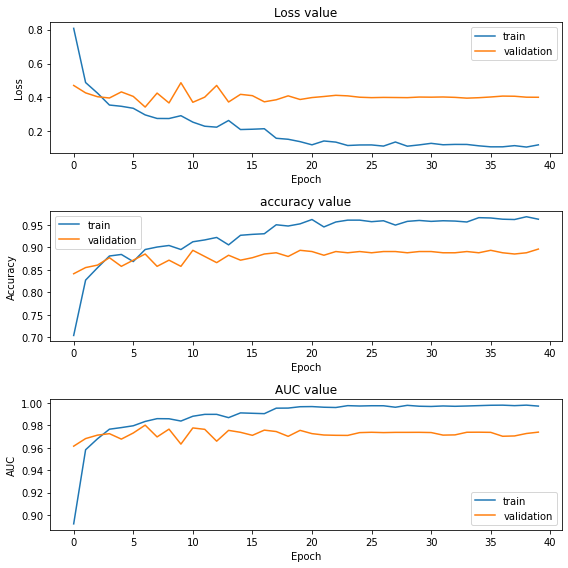

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_history(history_resnet,auc_num=2,name="resnet")

In [ ]:
y_pred=model_resnet.predict_generator(test_gen.flow(test_data))
submission_resnet = submission.copy()
submission_resnet.loc[:,'healthy':'scab']=y_pred

In [ ]:
submission_resnet.to_csv('submission_resnet.csv',index=False)
submission_resnet.sample(20)

,image_id,healthy,multiple_diseases,rust,scab
1270,Test_1270,2.688642e-02,0.034105,8.028881e-03,9.309797e-01
23,Test_23,4.561547e-07,0.000182,9.998173e-01,1.965119e-07
1398,Test_1398,1.611372e-06,0.000021,1.335252e-07,9.999771e-01
960,Test_960,5.879596e-06,0.005846,9.941228e-01,2.555186e-05
1632,Test_1632,3.188310e-06,0.000958,9.990387e-01,8.197639e-09
1144,Test_1144,1.347453e-12,0.003250,9.967499e-01,2.425404e-11
353,Test_353,9.965622e-01,0.000181,3.172916e-03,8.346273e-05
329,Test_329,9.790963e-01,0.000084,5.054636e-05,2.076934e-02
1765,Test_1765,2.063594e-04,0.000950,9.988143e-01,2.940634e-05
1492,Test_1492,5.005817e-02,0.012169,2.776340e-02,9.100097e-01


In [ ]:
!kaggle competitions submit -c plant-pathology-2020-fgvc7 -f submission_resnet.csv -m "bangkit Final Resnet 152(2)"

100% 166k/166k [00:01<00:00, 101kB/s]
Successfully submitted to Plant Pathology 2020 - FGVC7

#Efficient Net

In [ ]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator( 
                                                            rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
                                                            zoom_range = 0.1, # Randomly zoom image 
                                                            width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
                                                            height_shift_range=0.2,
                                                            horizontal_flip=True,vertical_flip=True,
                                                            preprocessing_function=efn.preprocess_input)
valid_gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=efn.preprocess_input)
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=efn.preprocess_input)

#full_gen.fit(full_data)
train_gen.fit(train_data)
valid_gen.fit(validation_data)
test_gen.fit(test_data)

In [ ]:
efn_base = efn.EfficientNetB5(include_top=False,input_shape=(224,224,3),weights='imagenet',pooling='avg')
efn_base.trainable = False

model_efn = tf.keras.models.Sequential()
model_efn.add(efn_base)
model_efn.add(tf.keras.layers.Flatten())
model_efn.add(tf.keras.layers.Dense(300,activation='relu'))
model_efn.add(tf.keras.layers.Dense(100,activation='relu'))
model_efn.add(tf.keras.layers.Dense(4,activation='softmax'))
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)

    

callbacks = [reduce_lr]
model_efn.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy',tf.keras.metrics.AUC()])

115515392/115515256 [==============================] - 3s 0us/step


In [ ]:
history_efn = model_efn.fit_generator(train_gen.flow(train_data,train_label),epochs=40,
                                      validation_data=valid_gen.flow(validation_data,validation_label),callbacks=callbacks)

Epoch 1/40
46/46 [==============================] - 19s 422ms/step - loss: 0.9230 - accuracy: 0.6202 - auc_3: 0.8548 - val_loss: 0.9735 - val_accuracy: 0.5890 - val_auc_3: 0.8634 - lr: 0.0010
Epoch 2/40
46/46 [==============================] - 17s 367ms/step - loss: 0.6883 - accuracy: 0.7507 - auc_3: 0.9190 - val_loss: 0.6565 - val_accuracy: 0.7644 - val_auc_3: 0.9319 - lr: 0.0010
Epoch 3/40
46/46 [==============================] - 17s 370ms/step - loss: 0.6867 - accuracy: 0.7473 - auc_3: 0.9202 - val_loss: 0.5309 - val_accuracy: 0.8247 - val_auc_3: 0.9509 - lr: 0.0010
Epoch 4/40
46/46 [==============================] - 17s 370ms/step - loss: 0.5971 - accuracy: 0.7740 - auc_3: 0.9393 - val_loss: 0.4836 - val_accuracy: 0.8329 - val_auc_3: 0.9592 - lr: 0.0010
Epoch 5/40
46/46 [==============================] - 17s 367ms/step - loss: 0.5697 - accuracy: 0.7946 - auc_3: 0.9442 - val_loss: 0.4740 - val_accuracy: 0.8247 - val_auc_3: 0.9605 - lr: 0.0010
Epoch 6/40
46/46 [======================

In [ ]:
#Refit
model_efn.fit_generator(full_gen.flow(full_data,full_label,batch_size=32),epochs=40,callbacks=callbacks)

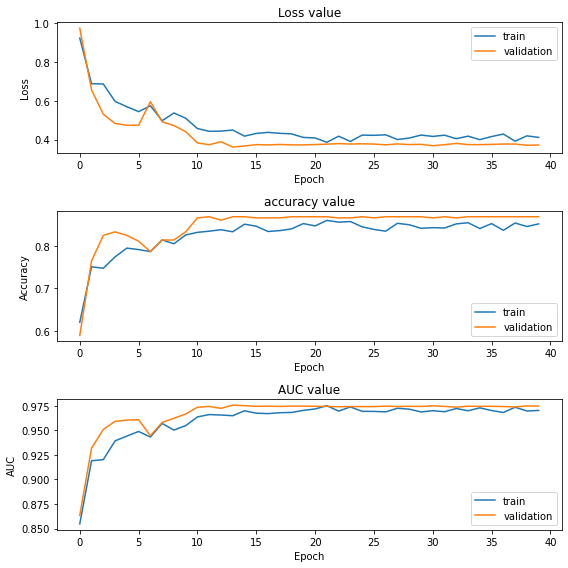

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_history(history_efn,auc_num=3,name="efn")

In [ ]:
y_pred=model_efn.predict_generator(test_gen.flow(test_data))
submission_efn = submission.copy()
submission_efn.loc[:,'healthy':'scab']=y_pred

In [ ]:
submission_efn.to_csv('submission_efn.csv',index=False)
submission_efn.sample(20)

In [ ]:
!kaggle competitions submit -c plant-pathology-2020-fgvc7 -f submission_efn.csv -m "bangkit Final EFNB5"